In [40]:
import cv2
import numpy as np

from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

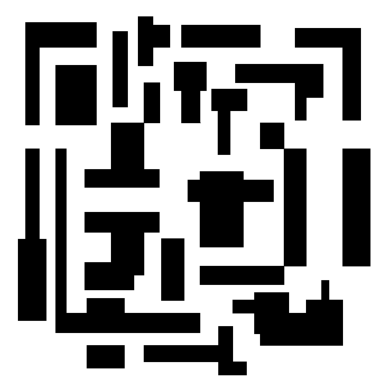

In [41]:
# Read an image
img = cv2.imread('./0.CC5.png')

plt.imshow(img)
plt.axis('off')
plt.show()

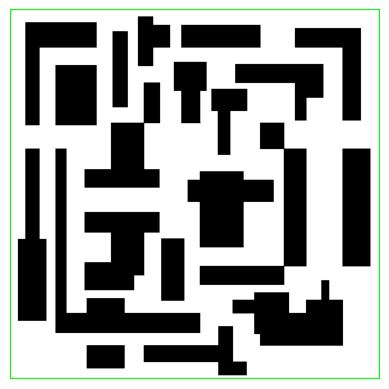

In [42]:
# Read an image
# img = cv2.imread('/content/drive/MyDrive/Assignment1/Question1/0.CC1.png')

# Convert image to binary (thresholding)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, I1 = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Find row and column indices where I1 == 255
r, c = np.where(I1 == 255)

# Check if r and c are empty before calculating min/max
if r.size == 0 or c.size == 0:
    print("No white pixels detected. Cannot draw bounding box.")
else:
    # Compute the bounding box coordinates
    minx, maxx = min(r), max(r)
    miny, maxy = min(c), max(c)

    # Draw the bounding box
    image_with_bbox = cv2.cvtColor(I1, cv2.COLOR_GRAY2BGR)  # Convert to BGR for color rectangle
    cv2.rectangle(
        image_with_bbox,
        (miny, minx),  # Top-left corner
        (maxy, maxx),  # Bottom-right corner
        (0, 255, 0),   # Red color in RGB
        2              # Line thickness
    )

    # Display the image
    plt.imshow(image_with_bbox, cmap='gray')
    plt.axis('off')
    plt.show()

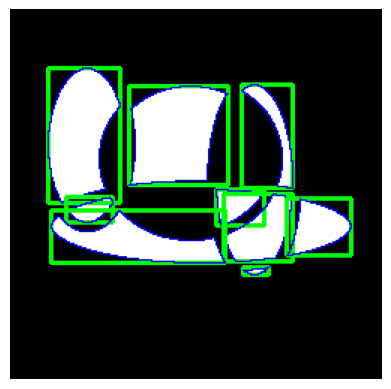

In [46]:


# Load the image in grayscale
image_path = "./0.CC4.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarize the image (convert to black & white)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Get image dimensions
height, width = binary.shape

# Initialize label matrix
labels = np.zeros((height, width), dtype=int)
visited = np.zeros((height, width), dtype=bool)

# Define connectivity (8-connected neighbors)
def get_neighbors(x, y):
    neighbors = [
        (x - 1, y - 1), (x - 1, y), (x - 1, y + 1),
        (x, y - 1),                 (x, y + 1),
        (x + 1, y - 1), (x + 1, y), (x + 1, y + 1)
    ]
    return [(nx, ny) for nx, ny in neighbors if 0 <= nx < height and 0 <= ny < width]

# DFS function for labeling connected components
def dfs(x, y, label):
    stack = [(x, y)]
    component = []
    
    while stack:
        cx, cy = stack.pop()
        if not visited[cx, cy] and binary[cx, cy] == 255:
            visited[cx, cy] = True
            labels[cx, cy] = label
            component.append((cx, cy))
            stack.extend(get_neighbors(cx, cy))
    
    return component

# Find connected components
components = []
label = 1

for i in range(height):
    for j in range(width):
        if binary[i, j] == 255 and not visited[i, j]:
            component = dfs(i, j, label)
            if component:
                components.append(component)
                label += 1

# Compute bounding boxes and contours
bounding_boxes = []
contours = []

for component in components:
    x_coords = [p[0] for p in component]
    y_coords = [p[1] for p in component]
    
    # Bounding box
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    bounding_boxes.append(((x_min, y_min), (x_max, y_max)))

    # Find boundary pixels
    boundary = []
    for x, y in component:
        for nx, ny in get_neighbors(x, y):
            if (nx, ny) not in component:
                boundary.append((x, y))
                break
    contours.append(boundary)

# Convert binary image to color for visualization
output_image = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

# Draw bounding boxes and contours
for box, contour in zip(bounding_boxes, contours):
    (x_min, y_min), (x_max, y_max) = box
    cv2.rectangle(output_image, (y_min, x_min), (y_max, x_max), (0, 255, 0), 2)  # Green bounding box
    
    # Draw contours in red
    for x, y in contour:
        output_image[x, y] = [0, 0, 255]  # Red boundary pixels

plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

For white background Image

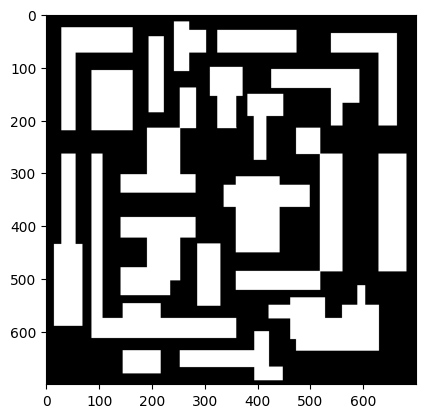

In [51]:


# Load the image in grayscale
image_path = "./0.CC5.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Binarize the image (convert to black & white)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Get image dimensions
height, width = binary.shape

for i in range(height):
    for j in range(width):
        if binary[i, j] == 255:
            binary[i, j] = 1
        else:
            binary[i, j] = 0

inverted_img= 1-binary
# print image
plt.imshow(inverted_img, cmap='gray')


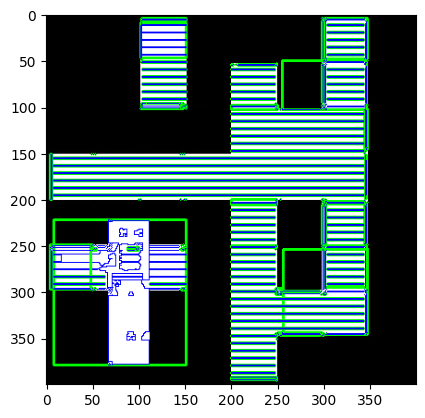

: 

In [73]:
import cv2
import numpy as np

# Load the image in grayscale
image_path = "./0.CC10.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Invert the image (White Background → Black, Black Objects → White)
binary = cv2.bitwise_not(image)

# Get image dimensions
height, width = binary.shape

# Initialize label matrix
labels = np.zeros((height, width), dtype=int)
visited = np.zeros((height, width), dtype=bool)

# Define connectivity (8-connected neighbors)
def get_neighbors(x, y):
    neighbors = [
        (x - 1, y - 1), (x - 1, y), (x - 1, y + 1),
        (x, y - 1),                 (x, y + 1),
        (x + 1, y - 1), (x + 1, y), (x + 1, y + 1)
    ]
    return [(nx, ny) for nx, ny in neighbors if 0 <= nx < height and 0 <= ny < width]

# DFS function for labeling connected components
def dfs(x, y, label):
    stack = [(x, y)]
    component = []
    
    while stack:
        cx, cy = stack.pop()
        if not visited[cx, cy] and binary[cx, cy] == 255:
            visited[cx, cy] = True
            labels[cx, cy] = label
            component.append((cx, cy))
            stack.extend(get_neighbors(cx, cy))
    
    return component

# Find connected components
components = []
label = 1

for i in range(height):
    for j in range(width):
        if binary[i, j] == 255 and not visited[i, j]:
            component = dfs(i, j, label)
            if component:
                components.append(component)
                label += 1

# Compute bounding boxes and contours
bounding_boxes = []
contours = []

for component in components:
    x_coords = [p[0] for p in component]
    y_coords = [p[1] for p in component]
    
    # Bounding box
    x_min, x_max = min(x_coords), max(x_coords)
    y_min, y_max = min(y_coords), max(y_coords)
    bounding_boxes.append(((x_min, y_min), (x_max, y_max)))

    # Find boundary pixels
    boundary = []
    for x, y in component:
        for nx, ny in get_neighbors(x, y):
            if (nx, ny) not in component:
                boundary.append((x, y))
                break
    contours.append(boundary)

# Convert binary image to color for visualization
output_image = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

# Draw bounding boxes and contours
for box, contour in zip(bounding_boxes, contours):
    (x_min, y_min), (x_max, y_max) = box
    cv2.rectangle(output_image, (y_min, x_min), (y_max, x_max), (0, 255, 0), 2)  # Green bounding box
    
    # Draw contours in red
    for x, y in contour:
        output_image[x, y] = [0, 0, 255]  # Red boundary pixels

plt.imshow(output_image, cmap='gray')
# Save and display output
# output_path = "./.png"
# cv2.imwrite(output_path, output_image)

# print(f"Processed image saved to: {output_path}")
